In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def delete_star(array, og_id):
    """
        og_id: id of the star on your original angular.png
    """
    array = np.delete(array, og_id, axis=0)
    array = np.delete(array, og_id, axis=1)

    return array

In [3]:
def remove_by_index(list, unwanted):
    for ele in sorted(unwanted, reverse = True): 
        del list[ele]

In [4]:
## Load ground truth csv file ##
groundtruth_dir = '../starfield_simulator/q1.csv'

df = pd.read_csv(groundtruth_dir, header = 0, index_col=0)
groundtruth_dist = np.asarray(df.values.tolist())
np.fill_diagonal(groundtruth_dist,0) # all diagonal elements should be zero, avoid nan

In [15]:
## Load NN csv file ##
NN_dir = '../star_tracker_simulator_detect/saved_results/lab_centroid/q1_NN_B10.csv'

df = pd.read_csv(NN_dir, header = 0, index_col=0)
NN_dist_B10 = np.asarray(df.values.tolist())
np.fill_diagonal(NN_dist_B10,0) # all diagonal elements should be zero, avoid nan

# delete star 0 and 7
NN_del_B10 = [3,8,14]
NN_dist_B10 = delete_star(NN_dist_B10, og_id=NN_del_B10)

print(NN_dist_B10.shape)

(13, 13)


In [42]:
## Load NN csv file ##
NN_dir = '../star_tracker_simulator_detect/saved_results/q1_NN_hot.csv'

df = pd.read_csv(NN_dir, header = 0, index_col=0)
NN_dist = np.asarray(df.values.tolist())
np.fill_diagonal(NN_dist,0) # all diagonal elements should be zero, avoid nan

# delete star 0 and 7
NN_del = [2, 8, 13]
NN_dist = delete_star(NN_dist, og_id=NN_del)

print(NN_dist.shape)


(12, 12)


In [44]:
## LoadGauss csv file ##
Gauss_dir = '../star_tracker_simulator_detect/saved_results/q1_Gauss_hot.csv'

df = pd.read_csv(Gauss_dir, header = 0, index_col=0)
Gauss_dist = np.asarray(df.values.tolist())
np.fill_diagonal(Gauss_dist,0) # all diagonal elements should be zero, avoid nan

# delete star 6 and 10
Gauss_del = [1, 6, 11] # star 1 false positive
Gauss_dist = delete_star(Gauss_dist, og_id=Gauss_del)

print(Gauss_dist.shape)

(9, 9)


In [45]:
## LoadGauss csv file ##
CoM_dir = '../star_tracker_simulator_detect/saved_results/q1_CoM_hot.csv'

df = pd.read_csv(CoM_dir, header = 0, index_col=0)
CoM_dist = np.asarray(df.values.tolist())
np.fill_diagonal(CoM_dist,0) # all diagonal elements should be zero, avoid nan

# delete star 6 and 10
CoM_del = [4,8]
CoM_dist = delete_star(CoM_dist, og_id=CoM_del)

print(CoM_dist.shape)

(8, 8)


## Align computed star ids with ground truth star id
The length of the list "compute_to_gt" should be the number of stars detected.  
For element $i$ in the list with integer value $j$, it represents that the $i^{th}$ detected star corresponds to the $j^{th}$ ground truth star.

In [17]:
NNB10_to_gt = [3,4,5,6,0,1,2,18,9,16,17,14,15,12,11,13]  

remove_by_index(NNB10_to_gt, unwanted=NN_del_B10) 
print(NNB10_to_gt)

[3, 4, 5, 0, 1, 2, 18, 16, 17, 14, 15, 12, 13]


In [46]:
NN_to_gt = [3,4,6,0,1,2,18,16,9,17,14,15,12,11,13] # for q1 hot

remove_by_index(NN_to_gt, unwanted=NN_del) 
print(NN_to_gt)

[3, 4, 0, 1, 2, 18, 16, 17, 14, 15, 12, 13]


In [47]:
Gauss_to_gt = [3,None,4,5,0,1,9,16,17,14,15,11] # for q1 hot

remove_by_index(Gauss_to_gt, unwanted=Gauss_del) 
print(Gauss_to_gt)

[3, 4, 5, 0, 1, 16, 17, 14, 15]


In [49]:
CoM_to_gt = [4,5,0,18,9,17,14,15,11,13] # for q1 hot

remove_by_index(CoM_to_gt, unwanted=CoM_del)
print(CoM_to_gt)

[4, 5, 0, 18, 17, 14, 15, 13]


In [18]:
groundtruth_NNB10 = np.zeros(NN_dist_B10.shape)
for row in range(len(NNB10_to_gt)):
    for col in range(len(NNB10_to_gt)):
        row_gt = NNB10_to_gt[row]
        col_gt = NNB10_to_gt[col]
        dist_gt = groundtruth_dist[row_gt, col_gt]

        groundtruth_NNB10[row,col] = dist_gt

In [50]:
groundtruth_NN = np.zeros(NN_dist.shape)
for row in range(len(NN_to_gt)):
    for col in range(len(NN_to_gt)):
        row_gt = NN_to_gt[row]
        col_gt = NN_to_gt[col]
        dist_gt = groundtruth_dist[row_gt, col_gt]

        groundtruth_NN[row,col] = dist_gt

In [51]:
groundtruth_Gauss = np.zeros(Gauss_dist.shape)

for row in range(len(Gauss_to_gt)):
    for col in range(len(Gauss_to_gt)):
        row_gt =Gauss_to_gt[row]
        col_gt =Gauss_to_gt[col]
        dist_gt = groundtruth_dist[row_gt, col_gt]

        groundtruth_Gauss[row,col] = dist_gt

In [52]:
groundtruth_CoM = np.zeros(CoM_dist.shape)

for row in range(len(CoM_to_gt)):
    for col in range(len(CoM_to_gt)):
        row_gt =CoM_to_gt[row]
        col_gt =CoM_to_gt[col]
        dist_gt = groundtruth_dist[row_gt, col_gt]

        groundtruth_CoM[row,col] = dist_gt

# Obtain Error

In [53]:
# tolerance of star id algoritm
tolerance = 0.02

Neural Network Batch Size = 10

In [19]:
error_array_NNB10 = np.abs(groundtruth_NNB10 - NN_dist_B10)

error_mean_NNB10 = np.mean(error_array_NNB10, axis=1,keepdims=True)
print(error_mean_NNB10*3600)

[[28.09137079]
 [25.94661205]
 [52.02919815]
 [19.74665316]
 [29.81277883]
 [26.58533188]
 [25.11119242]
 [41.70379441]
 [27.7907928 ]
 [29.56548143]
 [37.45593891]
 [47.18514715]
 [66.30171578]]


num of pairs=78
mean=38.11050064596885 arcsec
sigma=24.95249805894842 arcsec


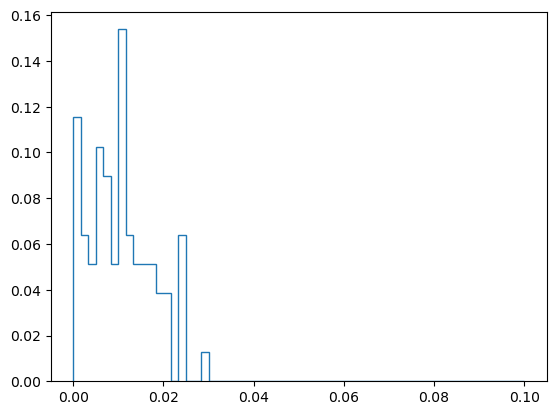

In [20]:
error_array_NNB10 = error_array_NNB10[np.triu_indices(error_array_NNB10.shape[0],k=1)]
print(f'num of pairs={error_array_NNB10.shape[0]}')

print(f'mean={np.mean(error_array_NNB10)*3600} arcsec')
print(f'sigma={np.std(error_array_NNB10)*3600} arcsec')

counts, bins = np.histogram(error_array_NNB10, bins=60, range=(0,0.1))
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), histtype='step') # Y axis will be probabilit
plt.show()

## Neural Network

In [54]:
error_array_NN = np.abs(groundtruth_NN - NN_dist)

error_mean_NN = np.mean(error_array_NN, axis=1,keepdims=True)
print(error_mean_NN*3600)
# bad stars: star 2, star 8, star 13

[[25.56558313]
 [30.61252431]
 [68.39034641]
 [26.45776883]
 [37.62713353]
 [38.77008202]
 [26.63057904]
 [41.61505688]
 [24.83962891]
 [73.6798135 ]
 [41.55155316]
 [40.72243286]]


num of pairs=66
mean=43.314772962449595 arcsec
sigma=31.46110232227916 arcsec


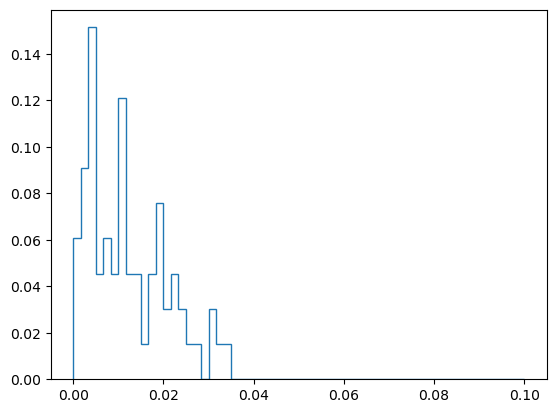

In [55]:
error_array_NN = np.abs(groundtruth_NN - NN_dist)
error_array_NN = error_array_NN[np.triu_indices(error_array_NN.shape[0],k=1)]
print(f'num of pairs={error_array_NN.shape[0]}')

print(f'mean={np.mean(error_array_NN)*3600} arcsec')
print(f'sigma={np.std(error_array_NN)*3600} arcsec')

counts, bins = np.histogram(error_array_NN, bins=60, range=(0,0.1))
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), histtype='step') # Y axis will be probabilit
plt.show()

num of pairs within tolerance =53
mean=31.05700752726611 arcsec
sigma=20.29568286379066 arcsec


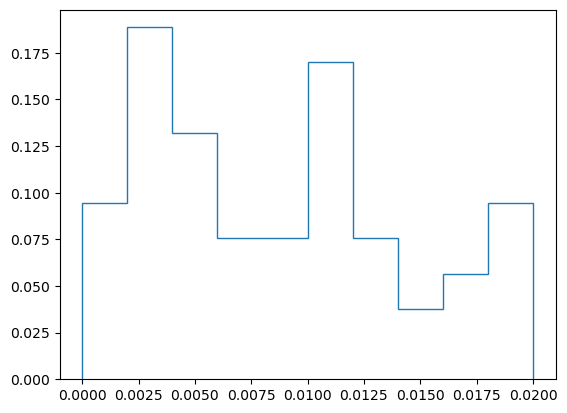

In [56]:
NN_tolr = error_array_NN[np.nonzero(error_array_NN < tolerance)]
print(f'num of pairs within tolerance ={NN_tolr.shape[0]}')
print(f'mean={np.mean(NN_tolr)*3600} arcsec')
print(f'sigma={np.std(NN_tolr)*3600} arcsec')

counts, bins = np.histogram(NN_tolr, bins=10, range=(0,tolerance))
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), histtype='step') # Y axis will be probabilit
plt.show()

# CoM

In [57]:
error_array_CoM = np.abs(groundtruth_CoM - CoM_dist)

error_mean_CoM = np.mean(error_array_CoM, axis=1,keepdims=True)
print(error_mean_CoM*3600)
# com bad stars: star 4

[[46.52018143]
 [50.07233067]
 [46.09454658]
 [53.57000815]
 [39.49531803]
 [40.92060343]
 [85.16971433]
 [64.12843594]]


num of pairs=28
mean=60.85301979551454 arcsec
sigma=37.59046287610146 arcsec


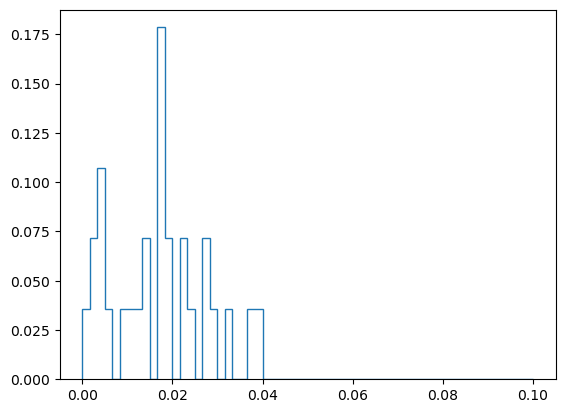

In [64]:
error_array_CoM = np.abs(groundtruth_CoM - CoM_dist)
error_array_CoM = error_array_CoM[np.triu_indices(error_array_CoM.shape[0],k=1)]
print(f'num of pairs={error_array_CoM.shape[0]}')

print(f'mean={np.mean(error_array_CoM)*3600} arcsec')
print(f'sigma={np.std(error_array_CoM)*3600} arcsec')


counts, bins = np.histogram(error_array_CoM, bins=60, range=(0,0.1))
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), histtype='step') # Y axis will be probabilit
plt.show()

num of pairs within tolerance =19
mean=40.196712136021524 arcsec
sigma=23.5294515549006 arcsec


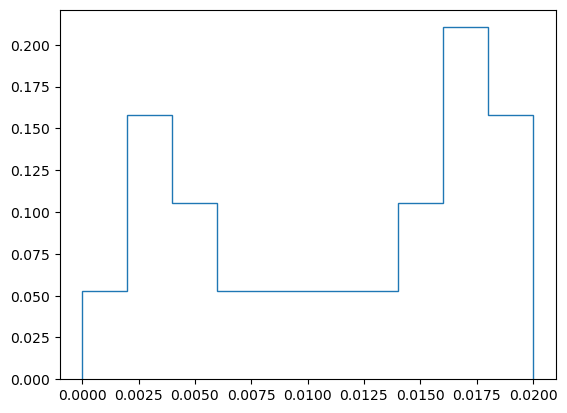

In [59]:
CoM_tolr = error_array_CoM[np.nonzero(error_array_CoM < tolerance)]
print(f'num of pairs within tolerance ={CoM_tolr.shape[0]}')
print(f'mean={np.mean(CoM_tolr)*3600} arcsec')
print(f'sigma={np.std(CoM_tolr)*3600} arcsec')

counts, bins = np.histogram(CoM_tolr, bins=10, range=(0,tolerance))
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), histtype='step') # Y axis will be probabilit
plt.show()

## Gaussian

In [60]:
error_array_Gauss = np.abs(groundtruth_Gauss - Gauss_dist)

error_mean_Gauss = np.mean(error_array_Gauss, axis=1,keepdims=True)
print(error_mean_Gauss*3600)

# Gauss bad stars: star 6, star 11 (remeber one false positive)

[[45.52998607]
 [39.1741751 ]
 [28.37211267]
 [59.07793799]
 [27.02905402]
 [37.7766257 ]
 [33.0120628 ]
 [33.38137043]
 [71.88820377]]


num of pairs=36
mean=46.90519106887892 arcsec
sigma=28.251732519341843 arcsec


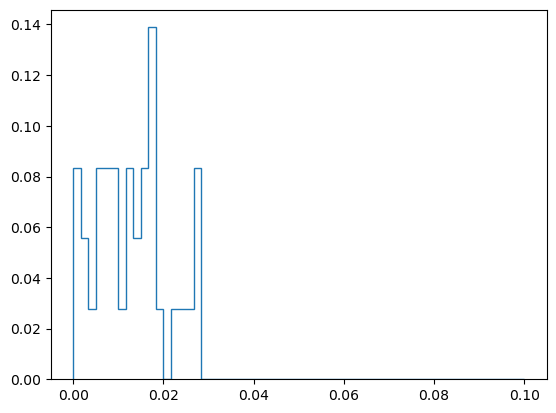

In [65]:
error_array_Gauss = np.abs(groundtruth_Gauss -Gauss_dist)
error_array_Gauss = error_array_Gauss[np.triu_indices(error_array_Gauss.shape[0],k=1)]
print(f'num of pairs={error_array_Gauss.shape[0]}')

print(f'mean={np.mean(error_array_Gauss)*3600} arcsec')
print(f'sigma={np.std(error_array_Gauss)*3600} arcsec')


counts, bins = np.histogram(error_array_Gauss, bins=60, range=(0,0.1))
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), histtype='step') # Y axis will be probabilit
plt.show()


num of pairs within tolerance =30
mean=37.69102414065203 arcsec
sigma=20.937392382168603 arcsec


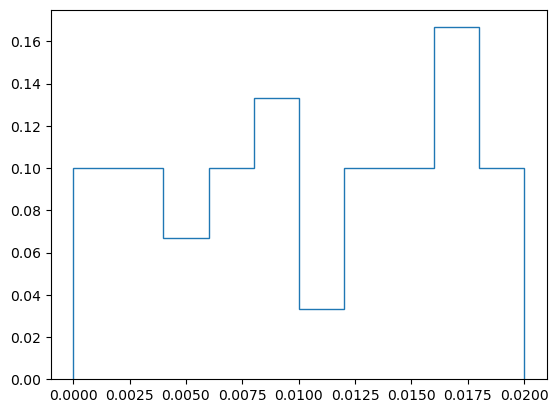

In [62]:
Gauss_tolr = error_array_Gauss[np.nonzero(error_array_Gauss < tolerance)]
print(f'num of pairs within tolerance ={Gauss_tolr.shape[0]}')
print(f'mean={np.mean(Gauss_tolr)*3600} arcsec')
print(f'sigma={np.std(Gauss_tolr)*3600} arcsec')

counts, bins = np.histogram(Gauss_tolr, bins=10, range=(0,tolerance))
plt.hist(bins[:-1], bins, weights=counts/counts.sum(), histtype='step') # Y axis will be probabilit
plt.show()

# Compare

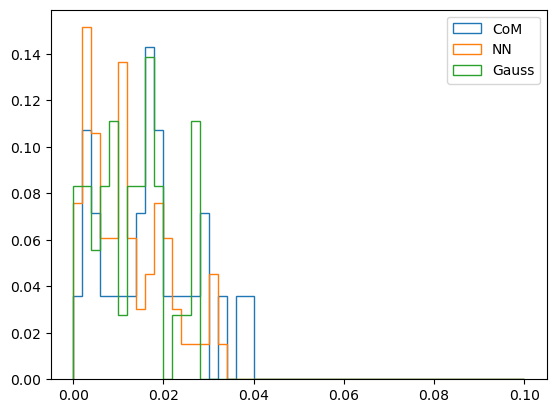

In [63]:
bins_total = 50

counts_CoM, bins_CoM = np.histogram(error_array_CoM, bins=bins_total, range=(0,0.1))
plt.hist(bins_CoM[:-1], bins_CoM, weights=counts_CoM/counts_CoM.sum(), histtype='step', label='CoM') # Y axis will be probabilit

counts_NN, bins_NN = np.histogram(error_array_NN, bins=bins_total, range=(0,0.1))
plt.hist(bins_NN[:-1], bins_NN, weights=counts_NN/counts_NN.sum(), histtype='step', label='NN') # Y axis will be probabilit

counts_base, bins_base = np.histogram(error_array_Gauss, bins=bins_total, range=(0,0.1))
plt.hist(bins_base[:-1], bins_base, weights=counts_base/counts_base.sum(), histtype='step', label='Gauss') # Y axis will be probabilit
plt.legend()
plt.show()

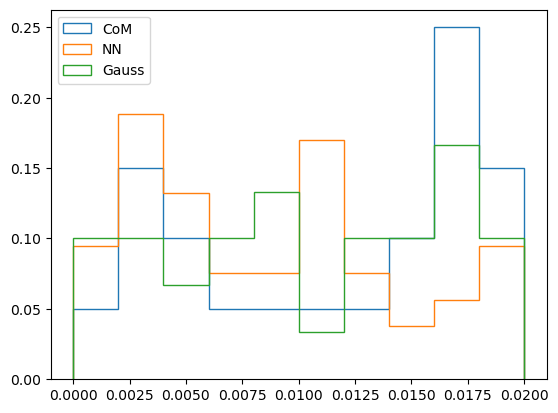

In [25]:
bins_total = 10

counts_CoM, bins_CoM = np.histogram(CoM_tolr, bins=bins_total, range=(0,tolerance))
plt.hist(bins_CoM[:-1], bins_CoM, weights=counts_CoM/counts_CoM.sum(), histtype='step', label='CoM') # Y axis will be probabilit

counts_NN, bins_NN = np.histogram(NN_tolr, bins=bins_total, range=(0,tolerance))
plt.hist(bins_NN[:-1], bins_NN, weights=counts_NN/counts_NN.sum(), histtype='step', label='NN') # Y axis will be probabilit

counts_base, bins_base = np.histogram(Gauss_tolr, bins=bins_total, range=(0,tolerance))
plt.hist(bins_base[:-1], bins_base, weights=counts_base/counts_base.sum(), histtype='step', label='Gauss') # Y axis will be probabilit
plt.legend()
plt.show()
